/var/folders/7y/6b82r8j576s0j4p84sz0f5dc0000gn/T/ipykernel_50769/326230655.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


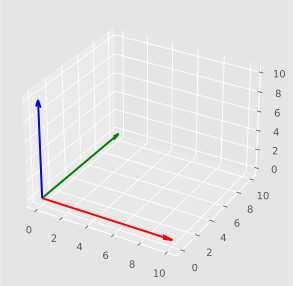

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import numpy as np
import matplotlib.pyplot as plt

def draw_axis(ax, T, darkness=1, length=.5):
    colors = ['r', 'g', 'b']
    origin = np.array([0, 0, 0, 1])  # Homogeneous coordinate for the origin
    
    for i in range(3):
        color = colors[i]
        
        # Define the end point of each axis in homogeneous coordinates
        end_point = np.array([0, 0, 0, 1])
        end_point[i] = length

        # Transform the origin and the end point using the transformation matrix T
        transformed_origin = np.dot(T, origin)
        transformed_end = np.dot(T, end_point)

        ax.quiver(transformed_origin[0], transformed_origin[1], transformed_origin[2],
                  transformed_end[0] - transformed_origin[0],
                  transformed_end[1] - transformed_origin[1],
                  transformed_end[2] - transformed_origin[2],
                  color=color, linewidth=2, arrow_length_ratio=0.07)

        # plot a sphere at the end of the arrow tip using scatter, edit the size
        ax.scatter(transformed_end[0], transformed_end[1], transformed_end[2], s=1, color=color)

        
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('#E5E5E5')

# Create a transformation matrix
T = np.eye(4)

# Draw axes with custom arrowheads
draw_axis(ax, T,length = 10)



In [88]:
import ipywidgets

def plt_fnc(angle):
    angle = np.deg2rad(angle)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.patch.set_facecolor('#E5E5E5')

    # rotation matrix
    R = np.array([[np.cos(angle), -np.sin(angle), 0],
                    [np.sin(angle), np.cos(angle), 0],
                    [0, 0, 1]])
    # translation matrix using R 
    T = np.eye(4)
    T[:3, :3] = R
    
    draw_axis(ax, T,length = 1)
    # edit the axis limits here
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-.2, .6)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(30, 30)
    ax.set_aspect("equal")
    # title
    ax.set_title(f'Rotation about the Z Axis by {np.rad2deg(angle):.2f} degrees')
    fig.tight_layout(pad=5)
    plt.show()


ipywidgets.interact(plt_fnc, angle=(0,360,10))

interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), Output()), _dom_classes=('w…

<function __main__.plt_fnc(angle)>

In [96]:
import ipywidgets

def plt_fnc2(xangle,yangle,zangle,xTranslation,yTranslation,zTranslation,time):
    zangle = time*np.deg2rad(zangle)
    xangle = time*np.deg2rad(xangle)
    yangle = time*np.deg2rad(yangle)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.patch.set_facecolor('#E5E5E5')

    # rotation matricies
    R = np.array([[np.cos(zangle), -np.sin(zangle), 0],
                    [np.sin(zangle), np.cos(zangle), 0],
                    [0, 0, 1]])
    R = np.array([[np.cos(yangle), 0, np.sin(yangle)],
                    [0, 1, 0],
                    [-np.sin(yangle), 0, np.cos(yangle)]]) @ R
    R = np.array([[1, 0, 0],
                    [0, np.cos(xangle), -np.sin(xangle)],
                    [0, np.sin(xangle), np.cos(xangle)]]) @ R
    
    # translation matrix using R 
    T = np.eye(4)
    T[0:3, 0:3] = R
    T[0:3, 3] = np.array([xTranslation*time,yTranslation*time,zTranslation*time])

    
    draw_axis(ax, T,length = 1)
    # edit the axis limits here
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(30, 30)
    ax.set_aspect("equal")
    # title
    ax.set_title(f'Transformation Matrix Demo')
    fig.tight_layout(pad=5)
    plt.show()

ipywidgets.interact(plt_fnc2, xangle=(0,360,10),yangle=(0,360,10),zangle=(0,360,10),xTranslation=(-1,1,.1),yTranslation=(-1,1,.1),zTranslation=(-1,1,.1),time=(0,1,.05))



interactive(children=(IntSlider(value=180, description='xangle', max=360, step=10), IntSlider(value=180, descr…

<function __main__.plt_fnc2(xangle, yangle, zangle, xTranslation, yTranslation, zTranslation, time)>

In [97]:
from IPython.display import display
    
# create interactive widgets
interactive_plot = ipywidgets.interactive(plt_fnc2, 
                                          xangle=ipywidgets.IntSlider(min=0, max=360, step=10, value=0), 
                                          yangle=ipywidgets.IntSlider(min=0, max=360, step=10, value=0), 
                                          zangle=ipywidgets.IntSlider(min=0, max=360, step=10, value=0), 
                                          xTranslation=ipywidgets.FloatSlider(min=-1, max=1, step=0.1, value=0), 
                                          yTranslation=ipywidgets.FloatSlider(min=-1, max=1, step=0.1, value=0), 
                                          zTranslation=ipywidgets.FloatSlider(min=-1, max=1, step=0.1, value=0), 
                                          time=ipywidgets.FloatSlider(min=0, max=1, step=0.05, value=0))

# get the children of the interactive plot (i.e., the widgets) and create a VBox for them
widgets = ipywidgets.VBox(interactive_plot.children[:-1])

# create an output widget to hold the plot
output = interactive_plot.children[-1]

# create a horizontal box to hold the widgets and the plot
display(ipywidgets.HBox([output, widgets]))
